In [113]:
import pandas as pd

## Milestone 3 - Data Preparation

### Task 1

In [ ]:
'''
def remove_rows_with_missing_ratings()
removes the rows with missing values in these columns. 
It should take in the dataset as a pandas dataframe and return the same type.

def combine_description_strings() 
The "Description" column contains lists of strings. 
Pandas recognises these as strings containing python lists
1. Remove records with a missing description.
2. Remove the 'About this space' prefix which every description starts with.
3. Remove empty quotes from lists.
3. Combine/ join the list items into one string.
It should take in the dataset as a pandas dataframe and return the same type.

def set_default_feature_values()
Replace entries with empty values with the number 1. 
It should take in the dataset as a pandas dataframe and return the same type.

def clean_tabular_data()
Takes in the raw data frame.
calls the three functions above sequentially 
on the output of the previous one, 
and returns the processed data.

if __name__ == "__main__"
1. Load the raw data in using pandas
2. Call clean_tabular_data on it
3. Save the processed data as clean_tabular_data.csv in the same folder 
as you found the raw tabular data.


'''

In [114]:
tabular_data_df = pd.read_csv('listing.csv')
tabular_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    988 non-null    object 
 1   Category              988 non-null    object 
 2   Title                 988 non-null    object 
 3   Description           900 non-null    object 
 4   Amenities             988 non-null    object 
 5   Location              988 non-null    object 
 6   guests                969 non-null    object 
 7   beds                  945 non-null    float64
 8   bathrooms             888 non-null    float64
 9   Price_Night           988 non-null    int64  
 10  Cleanliness_rating    890 non-null    float64
 11  Accuracy_rating       890 non-null    float64
 12  Communication_rating  890 non-null    float64
 13  Location_rating       890 non-null    float64
 14  Check-in_rating       890 non-null    float64
 15  Value_rating          8

In [93]:
tabular_data_df.isna().sum()

ID                        0
Category                  0
Title                     0
Description              88
Amenities                 0
Location                  0
guests                   19
beds                     43
bathrooms               100
Price_Night               0
Cleanliness_rating       98
Accuracy_rating          98
Communication_rating     98
Location_rating          98
Check-in_rating          98
Value_rating             98
amenities_count           0
url                       0
bedrooms                 82
Unnamed: 19             987
dtype: int64

In [94]:
tabular_data_df.dtypes

ID                       object
Category                 object
Title                    object
Description              object
Amenities                object
Location                 object
guests                   object
beds                    float64
bathrooms               float64
Price_Night               int64
Cleanliness_rating      float64
Accuracy_rating         float64
Communication_rating    float64
Location_rating         float64
Check-in_rating         float64
Value_rating            float64
amenities_count         float64
url                      object
bedrooms                 object
Unnamed: 19             float64
dtype: object

In [95]:
tabular_data_df.dropna(subset=['Cleanliness_rating', 'Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating'], inplace=True)

In [96]:
tabular_data_df.isna().sum()

ID                        0
Category                  0
Title                     0
Description              60
Amenities                 0
Location                  0
guests                   18
beds                     34
bathrooms                79
Price_Night               0
Cleanliness_rating        0
Accuracy_rating           0
Communication_rating      0
Location_rating           0
Check-in_rating           0
Value_rating              0
amenities_count           0
url                       0
bedrooms                 76
Unnamed: 19             889
dtype: int64

In [69]:
description_df = tabular_data_df['Description']
description_df

0      ['About this space', "Escape to one of these t...
1      ['About this space', "Come and spend a romanti...
2      ['About this space', 'Rustic cabin between the...
3      ['About this space', 'The Tree top cabin is si...
5      ['About this space', 'Charming cabin nestled i...
                             ...                        
982    ['About this space', 'An apartment directly on...
983    ['About this space', 'Light roomy space with o...
984    ['About this space', 'This specious two bedroo...
985    ['About this space', 'With all the modern amen...
987    ['About this space', 'Sea Scenes is a homely t...
Name: Description, Length: 890, dtype: object

In [70]:
type(description_df.loc[982])

str

In [71]:
type(description_df.loc[982])

str

In [88]:
tabular_data_df.dropna(subset=['Description'], inplace=True)


In [89]:
tabular_data_df.isna().sum()

ID                        0
Category                  0
Title                     0
Description               0
Amenities                 0
Location                  0
guests                   15
beds                     29
bathrooms                65
Price_Night               0
Cleanliness_rating        0
Accuracy_rating           0
Communication_rating      0
Location_rating           0
Check-in_rating           0
Value_rating              0
amenities_count           0
url                       0
bedrooms                 70
Unnamed: 19             829
dtype: int64

In [90]:
tabular_data_df['Description'].loc[0]

'[\'About this space\', "Escape to one of these two fabulous Tree Tents. Suspended high above the canopy, it’s time to appreciate life from a new perspective. Featured on George Clarke’s Amazing Spaces, these Tree Tents are a feat of aviation technology. Tree Tent comes complete with fire pit, outdoor kitchen and shower with hot water. You’ll discover a comfortable bed and cosy wood burning stove. Part of the Red Kite Estate, along with our barn and its sister tree tent, the first ever built in the UK, Dragon\'s Egg.", \'The space\', \'The space\\nThe true joy of this place is how wonderfully simple it is (aviation technology aside). Days are filled with fireside discussions, wildlife watching and stunningly beautiful walks. With the nearest mobile signal a ten minute walk away, it’s a great place to ditch the digital and truly escape. Head over the bridge to your own private deck that happily houses a clever outdoor-kitchen and shower (complete with hot water). It’s the perfect spot t

In [75]:
type(tabular_data_df['Description'].loc[0])

str

In [76]:
from ast import literal_eval

def clean_description_strings(text):
    try:
        description_list = literal_eval(text)
        description_list.remove('About this space')
        description_list = ''.join(description_list)
        return description_list
    except Exception as e:
        return text
        


tabular_data_df['Description'] = tabular_data_df['Description'].apply(clean_description_strings) 
    
tabular_data_df['Description']



0      Escape to one of these two fabulous Tree Tents...
1      Come and spend a romantic stay with a couple o...
2      Rustic cabin between the pines, 3 meters high ...
3      The Tree top cabin is situated in our peaceful...
5      Charming cabin nestled in the leaves, real unu...
                             ...                        
982    An apartment directly on the beach at Lancing,...
983    Light roomy space with outside garden 5 minute...
984    This specious two bedroom flat on the sea fron...
985    With all the modern amenities, our contemporar...
987    Sea Scenes is a homely two bedroom groundfloor...
Name: Description, Length: 830, dtype: object

In [77]:
tabular_data_df['Description'].replace([r"\\n", "\n", r"\'"], [" "," ",""], regex=True, inplace=True)

In [78]:
tabular_data_df['Description'].loc[0]

'Escape to one of these two fabulous Tree Tents. Suspended high above the canopy, it’s time to appreciate life from a new perspective. Featured on George Clarke’s Amazing Spaces, these Tree Tents are a feat of aviation technology. Tree Tent comes complete with fire pit, outdoor kitchen and shower with hot water. You’ll discover a comfortable bed and cosy wood burning stove. Part of the Red Kite Estate, along with our barn and its sister tree tent, the first ever built in the UK, Dragons Egg.The spaceThe space The true joy of this place is how wonderfully simple it is (aviation technology aside). Days are filled with fireside discussions, wildlife watching and stunningly beautiful walks. With the nearest mobile signal a ten minute walk away, it’s a great place to ditch the digital and truly escape. Head over the bridge to your own private deck that happily houses a clever outdoor-kitchen and shower (complete with hot water). It’s the perfect spot to fry up breakfast whilst basking in pe

In [ ]:
from ast import literal_eval

tabular_data_df['Description'] = tabular_data_df['Description'].apply(lambda x : literal_eval(str(x)))


In [ ]:
from ast import literal_eval

def literal_return(val):
    try:
        return literal_eval(val)
    except ValueError:
        return (val)

tabular_data_df['Description'] = tabular_data_df['Description'].apply(literal_return)

In [115]:
tabular_data_df[['guests','beds','bathrooms','bedrooms']]

,guests,beds,bathrooms,bedrooms
0,2,1.0,1.0,NaN
1,3,3.0,0.0,1
2,4,2.0,1.5,1
3,2,NaN,1.0,NaN
4,2,1.0,NaN,1
...,...,...,...,...
983,2,1.0,1.0,1
984,4,2.0,1.5,2
985,6,3.0,2.0,2
986,10,7.0,5.0,5


In [116]:
values = {"guests": 1, "beds": 1, "bathrooms": 1, "bedrooms": 1}
tabular_data_df.fillna(value=values, inplace=True)


In [117]:
tabular_data_df[['guests','beds','bathrooms','bedrooms']]

,guests,beds,bathrooms,bedrooms
0,2,1.0,1.0,1
1,3,3.0,0.0,1
2,4,2.0,1.5,1
3,2,1.0,1.0,1
4,2,1.0,1.0,1
...,...,...,...,...
983,2,1.0,1.0,1
984,4,2.0,1.5,2
985,6,3.0,2.0,2
986,10,7.0,5.0,5


In [ ]:
class Clean_airbnb_tabular_data:
    # don't forget init method!

    def remove_rows_with_missing_ratings(self):
        tabular_data_df.dropna(subset=['Cleanliness_rating', 'Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating'], inplace=True)
        print(tabular_data_df.isna().sum())
        return tabular_data_df

    def combine_description_strings():
        
        
        

        
        

    



        
        
def clean_description_strings(text):
    try:
        description_list = literal_eval(text)
        description_list.remove('About this space')
        description_list = ''.join(description_list)
        return description_list
    except Exception as e:
        return text
        


tabular_data_df['Description'] = tabular_data_df['Description'].apply(clean_description_strings) 
    
tabular_data_df['Description']















if __name__ == "__main__":
    tabular_data_df = pd.read_csv('listing.csv')


### Task 1 - Final solution

In [1]:
from ast import literal_eval
import pandas as pd


class Data_Preparation:
    # def __init__(self):
        

    def remove_rows_with_missing_ratings(self):
        airbnb_df.dropna(subset=['Cleanliness_rating', 'Accuracy_rating', 'Communication_rating', 'Location_rating', 'Check-in_rating', 'Value_rating'], inplace=True)
        return airbnb_df

    def clean_description_strings(self, text):
        try:
            description_list = literal_eval(text)
            description_list.remove('About this space')
            description_list = ''.join(description_list)
            return description_list
        except Exception as e:
                return text 

    def combine_description_strings(self):
        airbnb_df.dropna(subset=['Description'], inplace=True)
        airbnb_df['Description'] = airbnb_df['Description'].apply(self.clean_description_strings) 
        airbnb_df['Description'].replace([r"\\n", "\n", r"\'"], [" "," ",""], regex=True, inplace=True)
        return airbnb_df
      
    def set_default_feature_values(self):
        values = {"guests": 1, "beds": 1, "bathrooms": 1, "bedrooms": 1}
        airbnb_df.fillna(value=values, inplace=True)
        return airbnb_df

    def clean_tabular_data(self, airbnb_df):
        self.remove_rows_with_missing_ratings()
        self.combine_description_strings()
        self.set_default_feature_values()

if __name__ == '__main__':
    airbnb_df = pd.read_csv('listing.csv', index_col='ID')
    airbnb_df.drop('Unnamed: 19', axis=1, inplace=True)
    Data_processor = Data_Preparation()
    Data_processor.clean_tabular_data(airbnb_df)



    airbnb_df.to_csv(r'/Users/apple/Documents/GitHub/Data_Science_Airbnb/clean_tabular_data.csv') 


In [2]:
airbnb_df

,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms
ID,,,,,,,,,,,,,,,,,,
f9dcbd09-32ac-41d9-a0b1-fdb2793378cf,Treehouses,Red Kite Tree Tent - Ynys Affalon,Escape to one of these two fabulous Tree Tents...,"['What this place offers', 'Bathroom', 'Shampo...",Llandrindod Wells United Kingdom,2,1.0,1.0,105,4.6,4.7,4.3,5.0,4.3,4.3,13.0,https://www.airbnb.co.uk/rooms/26620994?adults...,1
1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd,Treehouses,Az Alom Cabin - Treehouse Tree to Nature Cabin,Come and spend a romantic stay with a couple o...,"['What this place offers', 'Bedroom and laundr...",Guyonvelle Grand Est France,3,3.0,0.0,92,4.3,4.7,4.6,4.9,4.7,4.5,8.0,https://www.airbnb.co.uk/rooms/27055498?adults...,1
d577bc30-2222-4bef-a35e-a9825642aec4,Treehouses,Cabane Entre Les Pins\n🌲🏕️🌲,"Rustic cabin between the pines, 3 meters high ...","['What this place offers', 'Scenic views', 'Ga...",Duclair Normandie France,4,2.0,1.5,52,4.2,4.6,4.8,4.8,4.8,4.7,51.0,https://www.airbnb.co.uk/rooms/51427108?adults...,1
ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc,Treehouses,Tree Top Cabin with log burner & private hot tub,The Tree top cabin is situated in our peaceful...,"['What this place offers', 'Bathroom', 'Hot wa...",Barmouth Wales United Kingdom,2,1.0,1.0,132,4.8,4.9,4.9,4.9,5.0,4.6,23.0,https://www.airbnb.co.uk/rooms/49543851?adults...,1
cfe479b9-c8f8-44af-9bc6-46ede9f14bb5,Treehouses,Treehouse near Paris Disney,"Charming cabin nestled in the leaves, real unu...","['What this place offers', 'Bathroom', 'Hair d...",Le Plessis-Feu-Aussoux Île-de-France France,4,3.0,1.0,143,5.0,4.9,5.0,4.7,5.0,4.7,32.0,https://www.airbnb.co.uk/rooms/935398?adults=1...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfbc88da-e88c-415a-b397-108d0948c4ba,Beachfront,Lancing Beach Apartment,"An apartment directly on the beach at Lancing,...","['What this place offers', 'Bathroom', 'Hair d...",Lancing United Kingdom,4,2.0,1.5,240,4.9,5.0,5.0,5.0,4.9,4.8,33.0,https://www.airbnb.co.uk/rooms/12680472?adults...,2
4fea5054-f999-4c07-addc-67e4d893deab,Beachfront,Apartment,Light roomy space with outside garden 5 minute...,"['What this place offers', 'Bathroom', 'Hair d...",Brighton and Hove England United Kingdom,2,1.0,1.0,78,4.8,5.0,4.9,4.9,5.0,4.9,54.0,https://www.airbnb.co.uk/rooms/48565992?adults...,1
282118e2-049e-4d9f-b2f2-b47477881b07,Beachfront,Sea front flat with a stunning view!,This specious two bedroom flat on the sea fron...,"['What this place offers', 'Scenic views', 'Be...",East Sussex England United Kingdom,4,2.0,1.5,113,4.8,5.0,5.0,5.0,5.0,4.8,38.0,https://www.airbnb.co.uk/rooms/49742544?adults...,2


## Task 3

In [6]:
def load_airbnb(label:str, df):
    features=df.drop(label, axis=1)
    labels=df[label]
    features = features.select_dtypes(include =['float64', 'int64'])
    return(features, labels)
    


X,y = load_airbnb('Price_Night', airbnb_df)

# print(X)
y









ID
f9dcbd09-32ac-41d9-a0b1-fdb2793378cf    105
1b4736a7-e73e-45bc-a9b5-d3e7fcf652fd     92
d577bc30-2222-4bef-a35e-a9825642aec4     52
ca9cbfd4-7798-4e8d-8c17-d5a64fba0abc    132
cfe479b9-c8f8-44af-9bc6-46ede9f14bb5    143
                                       ... 
cfbc88da-e88c-415a-b397-108d0948c4ba    240
4fea5054-f999-4c07-addc-67e4d893deab     78
282118e2-049e-4d9f-b2f2-b47477881b07    113
9ebf9cec-624e-480e-8704-dffa7cb1fe51     80
d2b06c80-c643-485d-a24b-15d0811a3166    104
Name: Price_Night, Length: 830, dtype: int64

# Milestone 4

### Task 1

In [17]:
# Start by importing your load_airbnb function defined earlier and using it to load in a dataset with the price per night ("Price_Night") as the label. At this point, it should only include numerical values. You will use the other modes of data later.
# Use sklearn to train a linear regression model to predict the "Price_Night" feature from the tabular data. You should find and use the built in model class SGDRegressor provided by sklearn instead of building your own from scratch.
# The point of this task is to get a baseline to compare other more advanced models to, and to try to improve upon.

from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X,y = load_airbnb('Price_Night', airbnb_df)

print(f"Number of samples in dataset: {len(X)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Testing: {len(y_test)}")




Number of samples in dataset: 830
Number of samples in:
    Training: 581
    Testing: 249


In [18]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size=0.5
)

print("Number of samples in:")
print(f"    Training: {len(y_train)}")
print(f"    Validation: {len(y_validation)}")
print(f"    Testing: {len(y_test)}")

Number of samples in:
    Training: 581
    Validation: 125
    Testing: 124


In [19]:
model = linear_model.SGDRegressor()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_validation_pred = model.predict(X_validation)
y_test_pred = model.predict(X_test)





In [26]:
train_loss = mean_squared_error(y_train, y_train_pred)
validation_loss = mean_squared_error(y_validation, y_validation_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(
        f"Train Loss: {train_loss} | Validation Loss: {validation_loss} | "
        f"Test Loss: {test_loss}"
    )

Train Loss: 5.003665847454544e+21 | Validation Loss: 3.1783914224896184e+19 | Test Loss: 2.9675720855124365e+19


In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

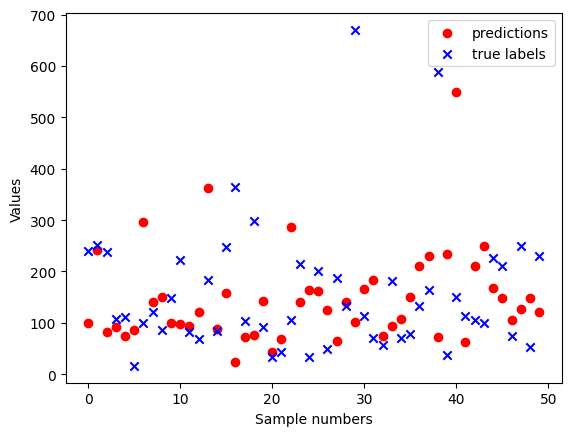

In [30]:
plot_predictions(y_test[:50], y_train[:50])